# Problem Statement

## Bigmart Sales Prediction

### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.  
### The aim is to build a predictive model and find out the sales of each product at a particular store.  Using this model, BigMart will try to understand the properties of products and stores which play a key role in  increasing sales. 

# import modules

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [132]:
train = pd.read_csv(r'D:\Downloads\Videos\Krish\Datasets\Bigmart\Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
# Stats info
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [134]:
# data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [135]:
# unique values
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing

In [137]:
# Null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [138]:
# Categorical values
cat_col = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [139]:
# Remove 'Item_Identifier', 'Outlet_Identifier'
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## printing categorical columns

In [140]:
for col in cat_col:
    print(col)
    print(train[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

### we can combine less than 100 count variables into one that increase our prediction
### we will combine attributes representing same values

### fill missing values
### calculating mean based on item identifire
### pivot table - creating new cat variables and filling them based on category

In [143]:
# if we don't specify values then it takes average values of all attributes 
item_weight_mean = train.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [144]:
miss_bool = train['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

## filling missing values

In [145]:
for i, item in enumerate(train['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            train['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight'] # loc = location
        else:
            train['Item_Weight'][i] = np.mean(train['Item_Weight'])

In [146]:
train['Item_Weight'].isnull().sum()

0

In [147]:
# filling missing values in Outlet_Size based on Outlet_Type
outlet_size_mode = train.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [148]:
miss_bull = train['Outlet_Size'].isnull()
# Store particular column and assigns bool values to right
# based on outlet type we are assigning missing values

# based on boolean values it will get Grocery Store / Supermarket Type1 /Supermarket Type2 /Supermarket Type3
# if outlet type is grocery store so it will return its mode
train.loc[miss_bull, 'Outlet_Size'] =  train.loc[miss_bull, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x]) 

In [149]:
train['Outlet_Size'].isnull().sum()

0

In [150]:
sum(train['Item_Visibility']== 0)

526

### replace zeros with mean

In [151]:
train.loc[:, 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace=True) # it will keep changes 

In [152]:
sum(train['Item_Visibility']== 0)

0

### Combine item fat content
### dictionary to represent whole columns
### old colmun is LF new column will be Low fat like that

In [153]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 
                                                              'low fat' : 'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creating new attributes

In [155]:
# It will get first two letters of attribute and we will store it in new item type
train['New_Item_type'] = train['Item_Identifier'].apply(lambda x : x[:2]) 
train['New_Item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_type, Length: 8523, dtype: object

In [156]:
train['New_Item_type'] = train['New_Item_type'].map({'FD' : 'Food', 'NC' : 'Non_Consumable', 'DR' : 'Drinks'})
train['New_Item_type'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: New_Item_type, dtype: int64

### condition train['New_Item_type']== 'Non_Consumable' true or false only supports bolean values 
### if true then we change item fat content

In [157]:
train.loc[train['New_Item_type']== 'Non_Consumable', 'Item_Fat_Content'] = 'Non_Edible'
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non_Edible    1599
Name: Item_Fat_Content, dtype: int64

### to reprsent big numbers into small we can use log or normal transformation
### create small values for establishment year
### data set collected in 2013

In [158]:
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

# Exploratory Data analysis

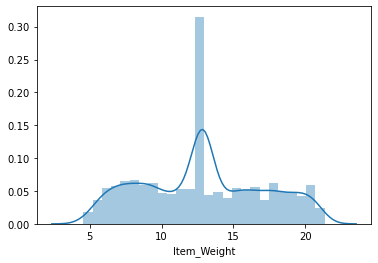

In [160]:
# numerical values
sns.distplot(train['Item_Weight'])
# mean is higher coz we have filled missing values with  mean
# high zeros means it don't have enogh data

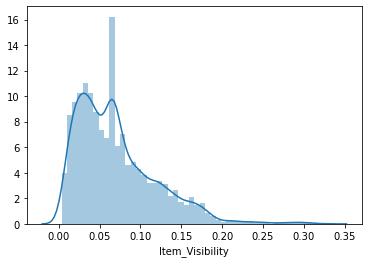

In [161]:
sns.distplot(train['Item_Visibility'])

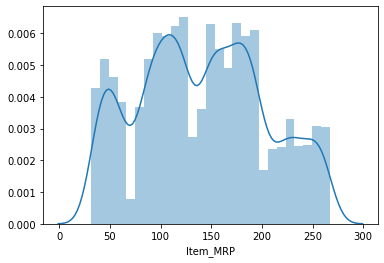

In [162]:
# you can split 4 hills into new categories
sns.distplot(train['Item_MRP'])

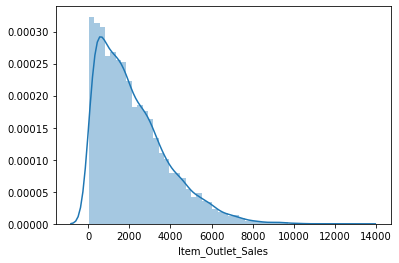

In [163]:
sns.distplot(train['Item_Outlet_Sales'])

## log transformation / min-max normalization / standardization
## log trans

In [164]:
train['Item_Outlet_Sales'] = np.log(1 + train['Item_Outlet_Sales']) # "1 +"" to avoid infinite values

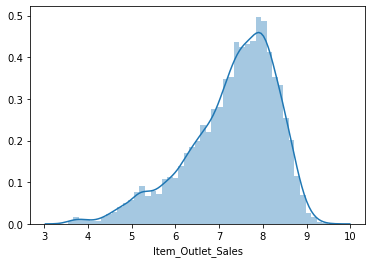

In [165]:
sns.distplot(train['Item_Outlet_Sales'])

## Categorical visualization

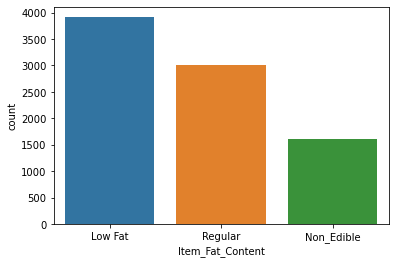

In [167]:
sns.countplot(train['Item_Fat_Content'])

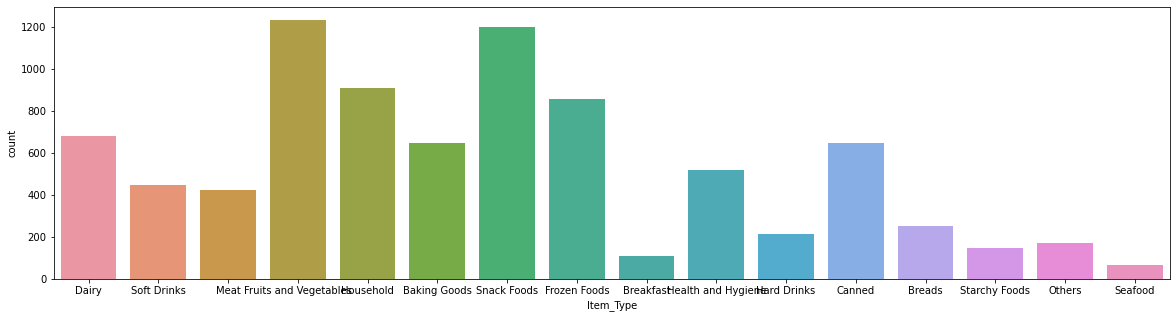

In [168]:
plt.figure(figsize = (20,5))
sns.countplot(train['Item_Type'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

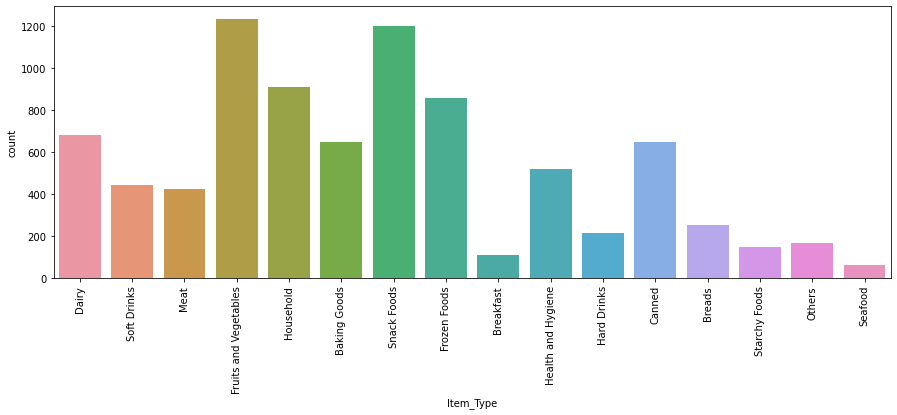

In [169]:
plt.figure(figsize = (15,5))
uni = list(train['Item_Type'].unique())
chart = sns.countplot(train['Item_Type'])
chart.set_xticklabels(labels = uni, rotation = 90)

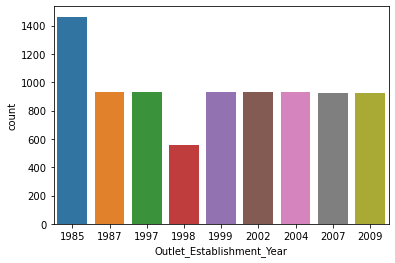

In [170]:
sns.countplot(train['Outlet_Establishment_Year'])

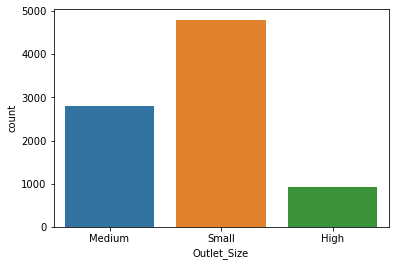

In [171]:
sns.countplot(train['Outlet_Size'])

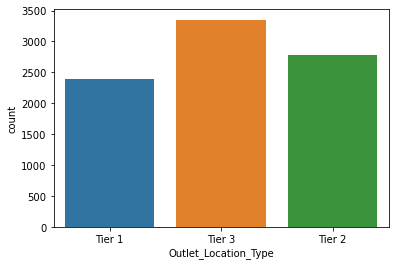

In [172]:
sns.countplot(train['Outlet_Location_Type'])

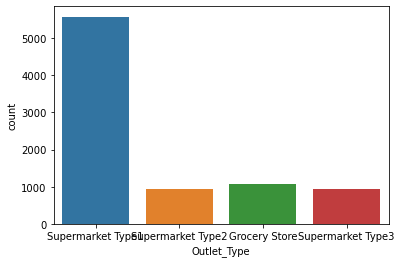

In [173]:
sns.countplot(train['Outlet_Type'])

## Corelation matrix

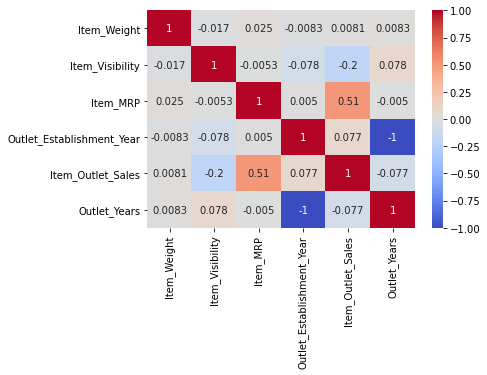

In [175]:
cor = train.corr()
sns.heatmap(cor, annot=True, cmap = 'coolwarm')

### outlet establishment year and outlet years are clearly diffrent and outlet years are derived from esta years
### so it had negative corr coeff and will remove utlet establishment year
### item outlet sale is target and from that we came to know highly impacting attribute
### item mrp is most imp from above

## Label encoding

In [178]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non_Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non_Consumable,26


## Category to numerical

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['outlet'] = le.fit_transform(train['Outlet_Identifier'])

cate_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_type']
for cat in cate_col:
    train[cat] = le.fit_transform(train[cat])

### more performance one hot encoding

### One hot encoding will create a new column for each category and it will be 1 for same category otherwise zero 
### it increases accuracy upto 0.2 to 0.5
### takes huge time to train the model

### get dummies represents one hot encoding
### give columns for encoding
### item types has many values = many features hence not including it

In [182]:
train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_type'])
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_type_0,New_Item_type_1,New_Item_type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


## Input Split
### regression - we can train entire data set and we can compare actual and predicted values
### then we get error and we can infer the model
### cross validation will auto split dataset
### We already found new attributes for some old attribures hence removing them

In [185]:
x = train.drop(columns = ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = train['Item_Outlet_Sales']

# Model Training

In [197]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

# Model 

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, x, y):
    # train the model
    model.fit(x,y)
    
    # predict the training set
    pred = model.predict(x)
    
    # perform cross validation
    cv_score = cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = 5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE: ", mean_squared_error(y, pred))
    print("CV Score: ", cv_score)

# LinearRegression

Model Report
MSE:  0.28800650325017957
CV Score:  0.2891182742641596


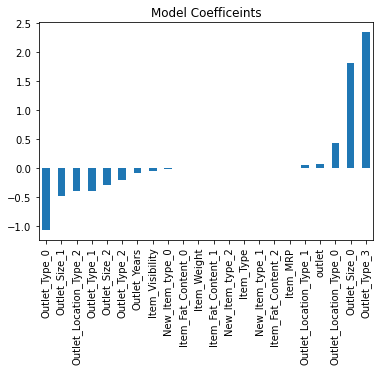

In [196]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, x, y)

coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = "Model Coefficeints")

## positive coeff
## negative coeff
## zero coefff = no much providing details

Model Report
MSE:  0.4280298560568349
CV Score:  0.4289289251562643


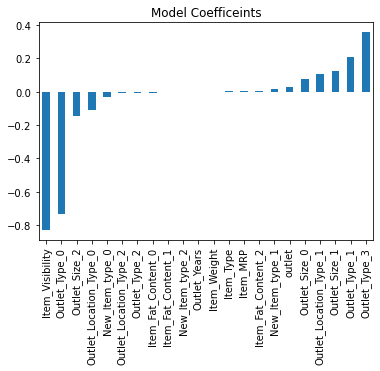

In [199]:
# Ridge
model = Ridge(normalize=True)
train(model, x, y)

coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = "Model Coefficeints")

## we need less error - model performs better

Model Report
MSE:  1.0305333080087593
CV Score:  1.030781898345697


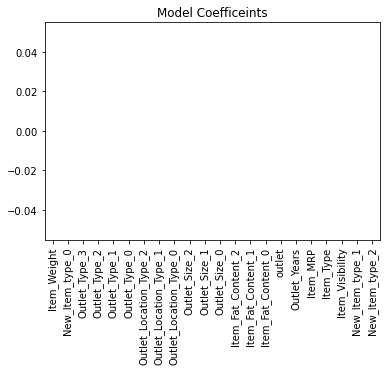

In [201]:
# Lasso
model = Lasso(normalize=True)
train(model, x, y)

coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = "Model Coefficeints")

# Lasso

Model Report
MSE:  0.7628688679102086
CV Score:  0.7630789166281843


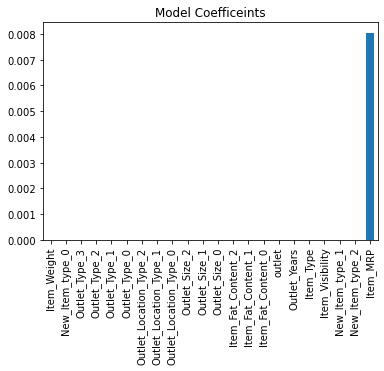

In [202]:
model = Lasso()
train(model, x, y)

coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = "Model Coefficeints")

# DecisionTreeRegressor

Model Report
MSE:  5.5534030638578795e-34
CV Score:  0.5795515179226166


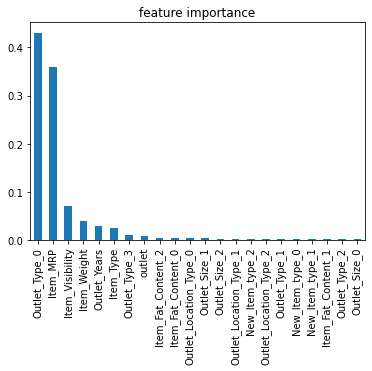

In [205]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)

coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = "feature importance")

### MSE is overfitted for decision tree
### on basis of cv score we choose better model
### here lesser the cv score better the model coz we are comparing neg mean squared error

Model Report
MSE:  0.04244878758359856
CV Score:  0.3106030050512235


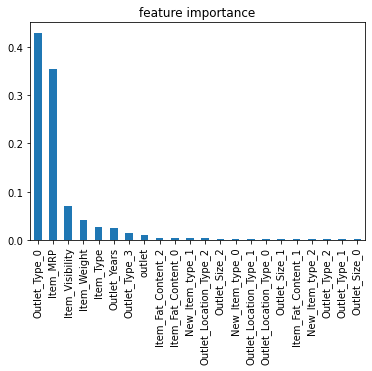

In [207]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
train(model, x, y)

coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = "feature importance")

# ExtraTreesRegressor

Model Report
MSE:  1.0398099340049763e-28
CV Score:  0.3314375126927699


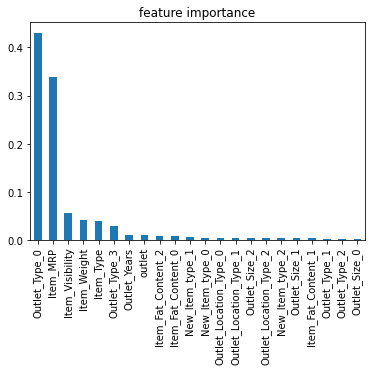

In [208]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
train(model, x, y)

coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar', title = "feature importance")

In [ ]:
# Hyper parameter tuning, grid search 

In [209]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, x, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
    model.fit(x_train,y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross validation
    cv_score = cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = 5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE: ", mean_squared_error(y_test, pred))
    print("CV Score: ", cv_score)

Model Report
MSE:  0.2899027971207218
CV Score:  0.2891182742641596


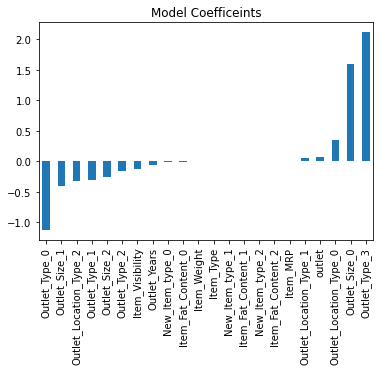

In [210]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, x, y)

coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = "Model Coefficeints")